In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [6]:
df = pd.read_csv('data/soil.csv')
hf = pd.read_csv('data/Sub_Division_IMD_2017.csv')

In [9]:
hf.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [8]:
df.head()

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56


In [10]:
hf = hf.dropna()
df = df.dropna()
df.isna().sum()
hf.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [48]:
#creating transformer
num_features = df.select_dtypes(exclude="object").columns
x = df  # Assigning df to x to ensure x is defined
cat_features= x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
Oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
   ("oh_encoder", Oh_transformer, cat_features),
   ("standard_scaler", numeric_transformer, num_features)
], remainder='passthrough')

x = preprocessor.fit_transform(x)

In [21]:
hf = hf.dropna()
df = df.dropna()
df.isna().sum()
hf.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [40]:
x.shape

(600, 601)

In [24]:
x.shape


(600, 601)

In [76]:
print("df_X_train shape:", df_X_train.shape)
print("df_y_train shape:", df_y_train.shape)
print("df_X_test shape:", df_X_test.shape)
print("df_y_test shape:", df_y_test.shape)
print("hf_X_train shape:", hf_X_train.shape)
print("hf_y_train shape:", hf_y_train.shape)
print("hf_X_test shape:", hf_X_test.shape)
print("hf_y_test shape:", hf_y_test.shape)

df_X_train shape: (480, 6)
df_y_train shape: (480,)
df_X_test shape: (120, 6)
df_y_test shape: (120,)
hf_X_train shape: (3329, 18)
hf_y_train shape: (3329,)
hf_X_test shape: (833, 18)
hf_y_test shape: (833,)


In [77]:
df_X_train = df_X_train.fillna(0)
df_X_test = df_X_test.fillna(0)
hf_X_train = hf_X_train.fillna(0)
hf_X_test = hf_X_test.fillna(0)

In [79]:
# Debugging: Check dataset shapes
print("df_X_train shape:", df_X_train.shape)
print("df_y_train shape:", df_y_train.shape)
print("df_X_test shape:", df_X_test.shape)
print("df_y_test shape:", df_y_test.shape)
print("hf_X_train shape:", hf_X_train.shape)
print("hf_y_train shape:", hf_y_train.shape)
print("hf_X_test shape:", hf_X_test.shape)
print("hf_y_test shape:", hf_y_test.shape)

# Training models on both datasets
for dataset_name, X_train, X_test, y_train, y_test in [
    ("df", df_X_train, df_X_test, df_y_train, df_y_test),
    ("hf", hf_X_train, hf_X_test, hf_y_train, hf_y_test)
]:
    print(f"Training models on {dataset_name} dataset")
    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mae, rmse, r2 = evaluate_model(y_test, y_pred)
            print(f"{model_name}: MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")
        except Exception as e:
            print(f"Error training {model_name} on {dataset_name}: {e}")
    print("=" * 50)

df_X_train shape: (480, 6)
df_y_train shape: (480,)
df_X_test shape: (120, 6)
df_y_test shape: (120,)
hf_X_train shape: (3329, 18)
hf_y_train shape: (3329,)
hf_X_test shape: (833, 18)
hf_y_test shape: (833,)
Training models on df dataset
Error training Linear Regression on df: could not convert string to float: 'Navsari'
Error training Random Forest on df: could not convert string to float: 'Navsari'
Error training Decision Tree on df: could not convert string to float: 'Navsari'
Training models on hf dataset
Error training Linear Regression on hf: could not convert string to float: 'Orissa'
Error training Random Forest on hf: could not convert string to float: 'Orissa'
Error training Decision Tree on hf: could not convert string to float: 'Orissa'


In [49]:
from sklearn.model_selection import train_test_split
y = df['Zn %']  # Define the target variable 'y' using the 'Zn %' column from the dataframe
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((480, 601), (120, 601))

In [54]:
def evaluate_model(true, predicted):
  
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true, predicted)
    return  mae, rmse, r2

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(),
    "catboost": CatBoostRegressor(),
   
}
model_list = []  # Initialize as a list, not a dictionary
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
print("-root mean squared error: {:.4f}".format(model_train_rmse))
print("-mean absolute error: {:.4f}".format(model_train_mae))
print("-r2_score: {:.4f}".format(model_train_r2))

print('Model performance for test set')
print("-root mean squared error: {:.4f}".format(model_test_rmse))
print("-mean absolute error: {:.4f}".format(model_test_mae))
print("-r2_score: {:.4f}".format(model_test_r2))

print('='*35)
print('\n')
    
print("---------------------------------------------------")
    

Linear Regression
Model performance for training set
Ridge
Model performance for training set
Lasso
Model performance for training set
KNN
Model performance for training set
Decision Tree
Model performance for training set
Random Forest
Model performance for training set
AdaBoost
Model performance for training set
SVR
Model performance for training set
XGBoost
Model performance for training set
Learning rate set to 0.03646
0:	learn: 23.9213991	total: 5.58ms	remaining: 5.58s
1:	learn: 23.2274611	total: 11.4ms	remaining: 5.68s
2:	learn: 22.5646174	total: 16ms	remaining: 5.3s
3:	learn: 21.8930563	total: 20.1ms	remaining: 5s
4:	learn: 21.2796269	total: 23.9ms	remaining: 4.76s
5:	learn: 20.7098443	total: 27.9ms	remaining: 4.62s
6:	learn: 20.2104270	total: 32.7ms	remaining: 4.63s
7:	learn: 19.6673874	total: 36.4ms	remaining: 4.51s
8:	learn: 19.2063617	total: 41.6ms	remaining: 4.59s
9:	learn: 18.6010910	total: 46ms	remaining: 4.56s
10:	learn: 18.0512874	total: 51.5ms	remaining: 4.63s
11:	lear

In [69]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_score']).sort_values(by=["R2_score"], ascending=False)
display(results)  # If in Jupyter Notebook

,Model name,R2_score


In [70]:
# Append R² scores to r2_list
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    _, _, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    r2_list.append(model_test_r2)

# Display R² scores for all models
for model_name, r2 in zip(model_list, r2_list):
    print(f"Model: {model_name}, R² Score: {r2:.4f}")

Learning rate set to 0.03646
0:	learn: 23.9213991	total: 5.46ms	remaining: 5.46s
1:	learn: 23.2274611	total: 9.69ms	remaining: 4.84s
2:	learn: 22.5646174	total: 15ms	remaining: 4.99s
3:	learn: 21.8930563	total: 19.2ms	remaining: 4.79s
4:	learn: 21.2796269	total: 22.9ms	remaining: 4.55s
5:	learn: 20.7098443	total: 26.6ms	remaining: 4.4s
6:	learn: 20.2104270	total: 31.6ms	remaining: 4.49s
7:	learn: 19.6673874	total: 35.6ms	remaining: 4.41s
8:	learn: 19.2063617	total: 39.4ms	remaining: 4.34s
9:	learn: 18.6010910	total: 43.3ms	remaining: 4.29s
10:	learn: 18.0512874	total: 49.2ms	remaining: 4.42s
11:	learn: 17.5679241	total: 53ms	remaining: 4.36s
12:	learn: 17.0444580	total: 57.4ms	remaining: 4.35s
13:	learn: 16.5590438	total: 62.2ms	remaining: 4.38s
14:	learn: 16.1067932	total: 68.1ms	remaining: 4.47s
15:	learn: 15.6247719	total: 71.8ms	remaining: 4.42s
16:	learn: 15.1537625	total: 76.1ms	remaining: 4.4s
17:	learn: 14.7034397	total: 81.2ms	remaining: 4.43s
18:	learn: 14.3099961	total: 86.2

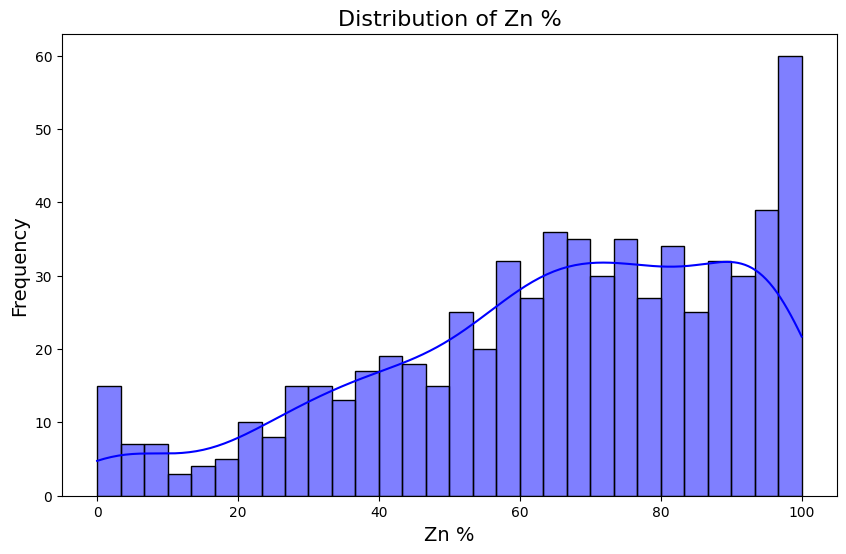

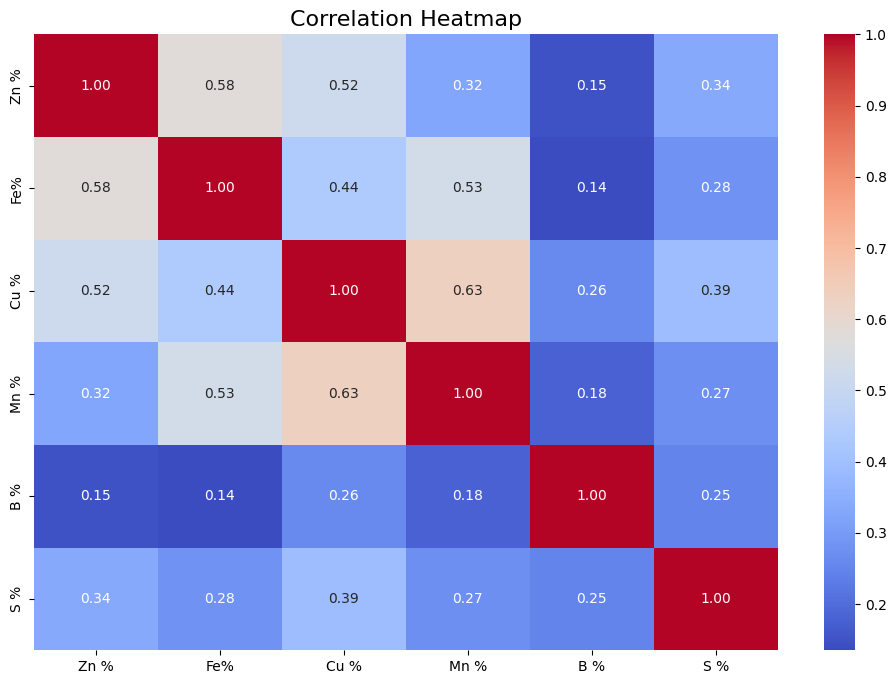

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Zn %'], kde=True, bins=30, color='blue')
plt.title('Distribution of Zn %', fontsize=16)
plt.xlabel('Zn %', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()